# Results Analysis

Analyze out-of-sample predictions and visualize performance.

In [1]:

import os
import pandas as pd
import matplotlib.pyplot as plt

import joblib


In [3]:
def train_test_split_time(df : pd.DataFrame, split : float = 0.8):
    n = len(df)
    cut = int(n * split)
    return df.iloc[:cut].copy(), df.iloc[cut:].copy()

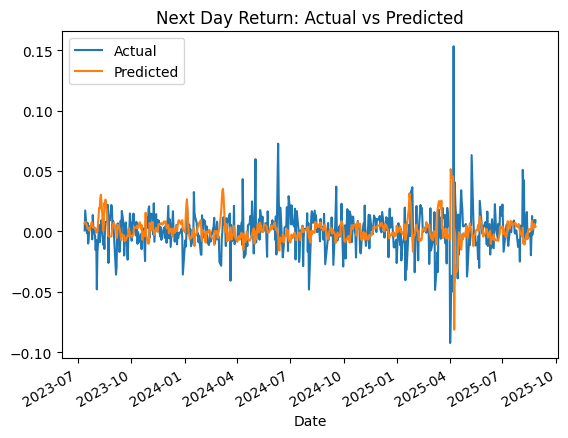

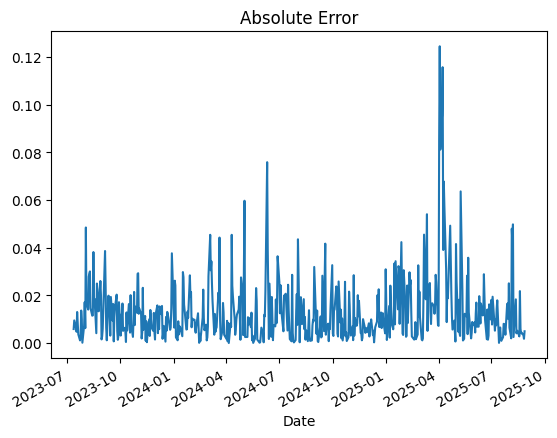

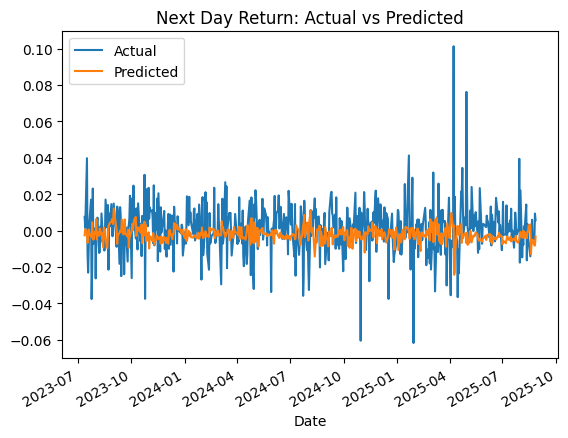

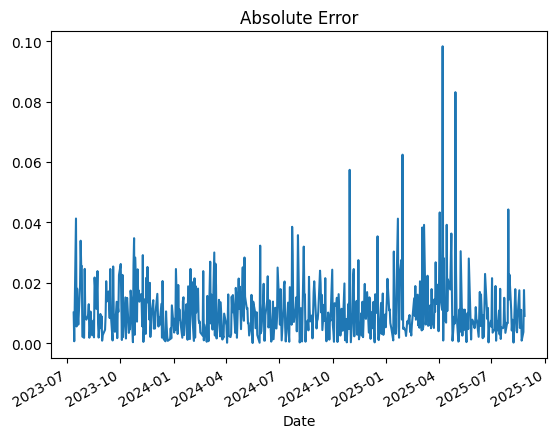

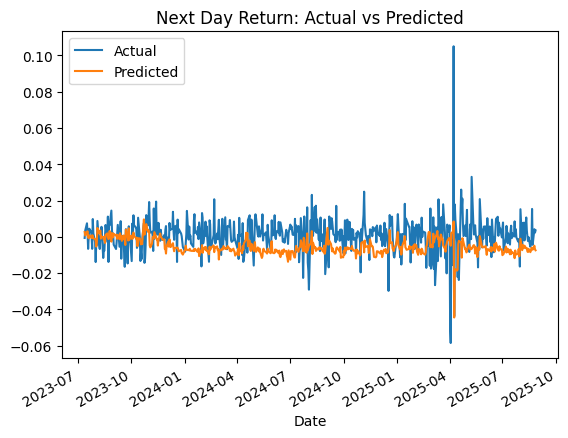

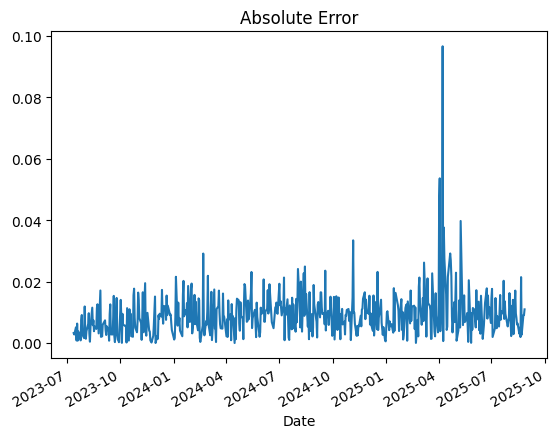

In [4]:
for i in os.listdir("../data/processed/"):
    df = pd.read_csv("../data/processed/" + i, parse_dates = ["Date"], index_col = "Date")
    feature_cols = ["ret_1d", "ret_5d", "ma_5", "ma_10", "ema_10", "vol_5d", "rsi_14"]
    df = df.dropna(subset = feature_cols + ["y_next_ret"])

    train, test = train_test_split_time(df, split = 0.8)
    X_te, y_te = test[feature_cols], test["y_next_ret"]

    model = joblib.load(f"../models/{i.split("_")[0].lower()}_model.pkl")
    preds = model.predict(X_te)

    plt.figure()
    pd.Series(y_te, index = X_te.index).plot(label = "Actual")
    pd.Series(preds, index = X_te.index).plot(label = "Predicted")
    plt.legend()
    plt.title("Next Day Return: Actual vs Predicted")
    plt.show()

    err = (preds - y_te).abs()
    plt.figure()
    err.plot(title = "Absolute Error")
    plt.show()

In [5]:
X_te

,ret_1d,ret_5d,ma_5,ma_10,ema_10,vol_5d,rsi_14
Date,,,,,,,
2023-07-13,0.007937,0.022518,431.757996,430.951453,430.938631,0.004503,71.527645
2023-07-14,-0.000623,0.024467,433.848364,432.039493,432.155544,0.003787,70.901820
2023-07-17,0.003472,0.025429,436.026404,432.775897,433.427490,0.003665,72.352932
2023-07-18,0.007430,0.026511,438.311578,433.788934,435.061462,0.003790,75.211640
2023-07-19,0.002224,0.020582,440.099963,434.964639,436.577220,0.003607,76.016810
...,...,...,...,...,...,...,...
2025-08-21,-0.004012,-0.014575,640.041992,640.583997,638.751932,0.001948,53.261932
2025-08-22,0.015357,0.002906,640.415991,641.396997,639.944308,0.008465,63.297183
2025-08-25,-0.004401,-0.001290,640.249988,642.051996,640.403519,0.008768,59.306763
